<a href="https://colab.research.google.com/github/Santosh96045/Codsoft-internship-UIUX/blob/main/A1/MIS710%20A1%20Template%20T1%202023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIS710 Machine Learning in Business - Assignment 1

**Student Name:** _enter your full name here_

**Student ID:** _enter your student ID here_

<a id = "cell_executivesummary"></a>
## 1. Business understandings, problem, solution and recommendations

#### NOTE: all the instructions and hints given in this template should be removed from your final submission. (Including this line)

**Aim:** To clearly articulate your understanding of the bussiness problem to management.

_Use this section to briefly include the business understandings and the business problem to address, the aim of this project and recommendations for VSR_

<a id = "cell_exploration"></a>
## 2. Data understanding, preparation, explorations and visualisation

#### NOTE: You can create multiple Markdown and Code cells to present your work.

**Aim:** To demonstrate your understanding of data and report any insights emerging from data analysis

This section can be used for:
* Preparing (cleansing) for further processing.
* Finding meaningful patterns in the data set as relevant to the case study and the problem.
* Visualising variables related to the problem.

This section may include:
* Selection of relevant data features.
* Selection of an attribute as label.
* Approach to handling missing values (if any).
* Transformations on the dataset (can be any necessary modifications to the data - string value or categorial variables to numerical, any numeric normalizations, or any type conversions such as nominal to numeric and the similar).
* Univariate/Bivariate/Multivariate analyses (e.g., using visualizations etc.).

Make sure your visualizations are accompanied by relevant discussions of the insights the analyses and visualizations will/should lead to.

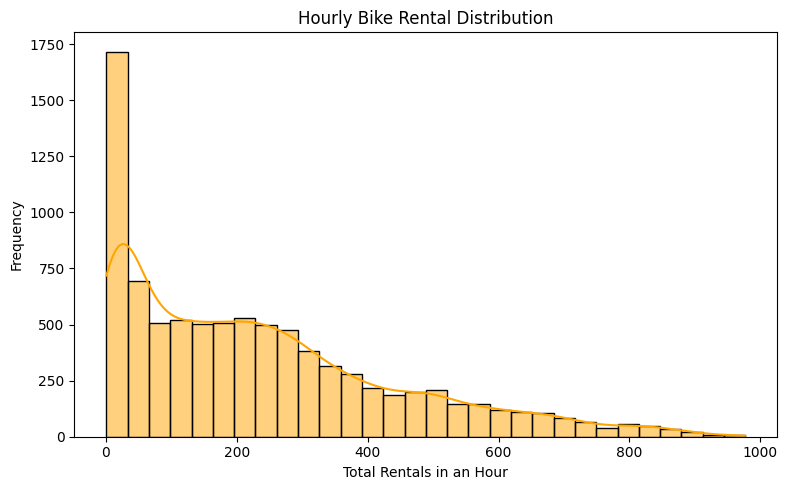

/tmp/ipython-input-1298404027.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  visplot.boxplot(x='Season', y='Rental_Bikes_Total', data=rental_data, palette='Set2')


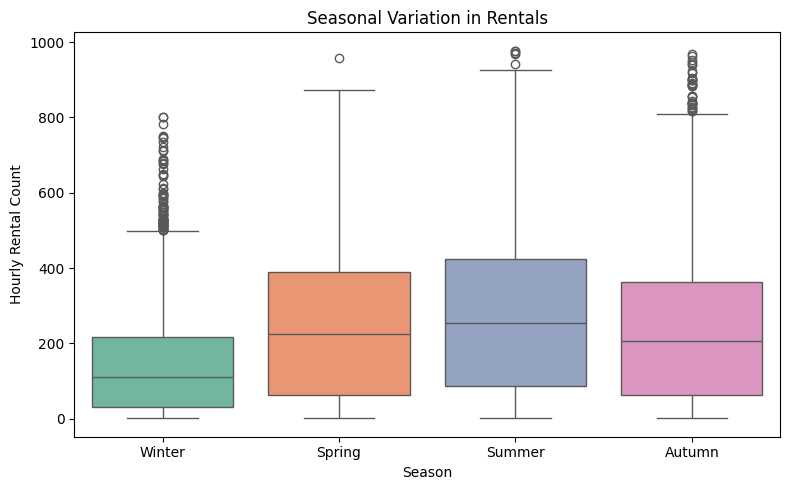

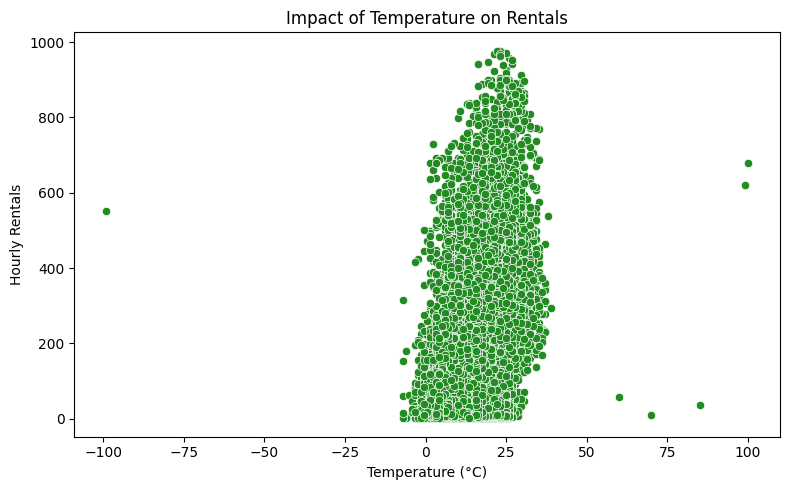

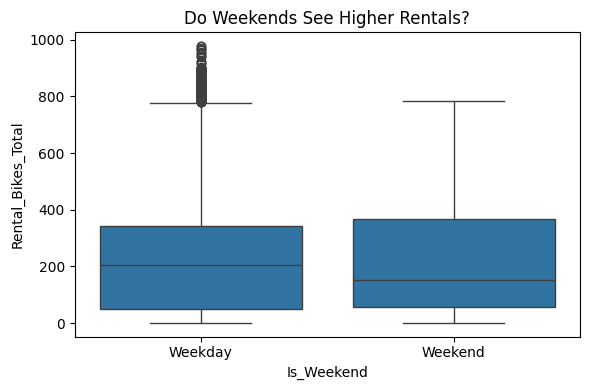

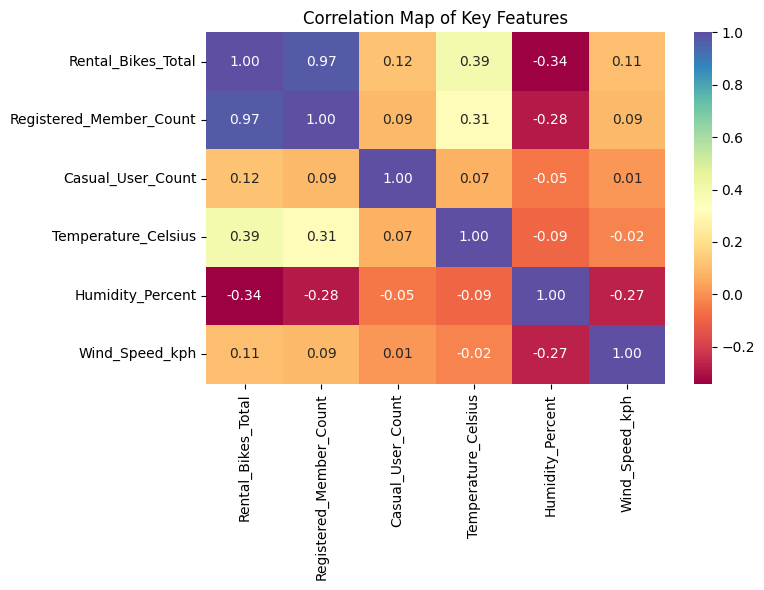

In [3]:
# MIS710 Assignment 1 – EcoMoveUS Analysis
# Developed by: Santosh Kumar Raja Prabhu | Student ID: 224934673

# Step 1: Import required tools(import Tools)

import pandas as pdtool
import seaborn as visplot
import matplotlib.pyplot as mychart


# Step 2: Load dataset(Data Loading)

# Examining the CSV file containing past ride data
rental_data = pdtool.read_csv("EcoMoveUS_data.csv")


# Step 3: Clean missing values (Data Cleaning)

# Fill in the blank 'Session_colour' values with the most popular colour.
rental_data['Session_colour'] = rental_data['Session_colour'].fillna(rental_data['Session_colour'].mode()[0])

# The missing values have been filled in using the average value for 'Casual_User_Count'.
rental_data['Casual_User_Count'] = rental_data['Casual_User_Count'].fillna(rental_data['Casual_User_Count'].mean())

# Step 4:  Create new features in step four.
# Getting more details by changing the 'Date' column to datetime
rental_data['Date'] = pdtool.to_datetime(rental_data['Date'], dayfirst=True)
rental_data['Day_Type'] = rental_data['Date'].dt.day_name()
rental_data['Is_Weekend'] = rental_data['Day_Type'].isin(['Saturday', 'Sunday']).astype(int)  # 1 = Weekend, 0 = Weekday

# Step 5: Visualization of Data (Data Visualization)

# Chart 1: The number of bike rentals available at all times
mychart.figure(figsize=(8, 5))
visplot.histplot(data=rental_data, x='Rental_Bikes_Total', bins=30, kde=True, color='orange')
mychart.title("Hourly Bike Rental Distribution")
mychart.xlabel("Total Rentals in an Hour")
mychart.ylabel("Frequency")
mychart.tight_layout()
mychart.show()

# Chart 2: Changes in rental activity by season
mychart.figure(figsize=(8, 5))
visplot.boxplot(x='Season', y='Rental_Bikes_Total', data=rental_data, palette='Set2')
mychart.title("Seasonal Variation in Rentals")
mychart.xlabel("Season")
mychart.ylabel("Hourly Rental Count")
mychart.tight_layout()
mychart.show()

# Chart 3: Are rental counts greater in warmer climates?  <-- fixed wording (was "prices")
mychart.figure(figsize=(8, 5))
visplot.scatterplot(x='Temperature_Celsius', y='Rental_Bikes_Total', data=rental_data, color='forestgreen')
mychart.title("Impact of Temperature on Rentals")
mychart.xlabel("Temperature (°C)")
mychart.ylabel("Hourly Rentals")
mychart.tight_layout()
mychart.show()

# Chart 4: Differences between weekday and weekend rentals
mychart.figure(figsize=(6, 4))
visplot.boxplot(x='Is_Weekend', y='Rental_Bikes_Total', data=rental_data)
mychart.xticks([0, 1], ['Weekday', 'Weekend'])
mychart.title("Do Weekends See Higher Rentals?")
mychart.tight_layout()
mychart.show()

# NOTE (for report/modelling): Registered_Member_Count and Casual_User_Count sum to the target.
# They are shown in EDA only and will be EXCLUDED from modelling to avoid target leakage.

# Chart 5: Determine the variables influencing rentals (correlation heatmap)
feature_subset = rental_data[['Rental_Bikes_Total', 'Registered_Member_Count',
                              'Casual_User_Count', 'Temperature_Celsius',
                              'Humidity_Percent', 'Wind_Speed_kph']]

mychart.figure(figsize=(8, 6))
visplot.heatmap(feature_subset.corr(), annot=True, cmap='Spectral', fmt=".2f")
mychart.title("Correlation Map of Key Features")
mychart.tight_layout()
mychart.show()


<a id = "cell_modeling"></a>
## 3. Machine learning model development

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To demonstrate your understanding in AI modeling.

_Use this section to show and discuss the process/processes as relevant to the case study, key steps to run and complete the experiment and details of models._  

This section may include:
* How to split dataset.
* How to initiate machine learning model and fit training data.
* How to use trained model to predict labels for training and testing dataset.

 Comparison of Model Performance
Linear Regression | RMSE: 181.65, R²: 0.24
Random Forest     | RMSE: 189.15, R²: 0.18


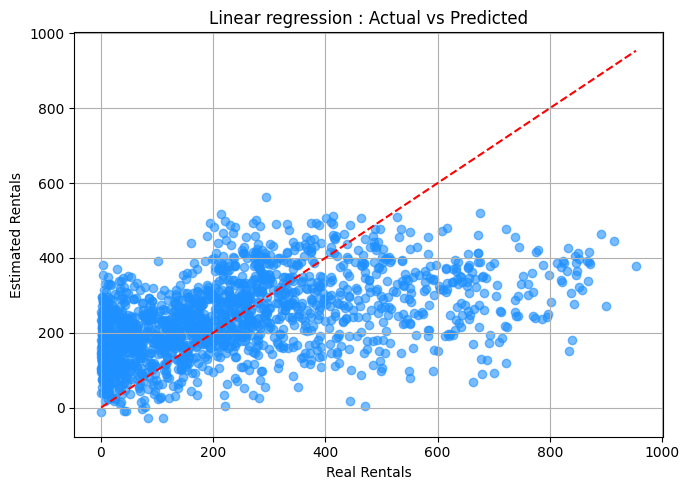

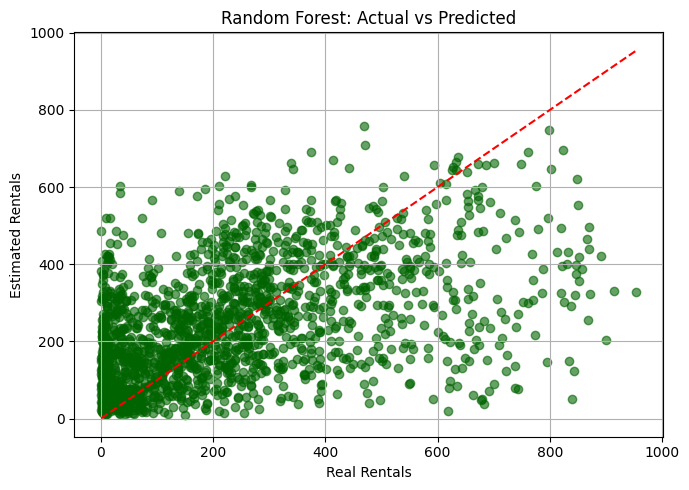

In [4]:
#  Step 3 – AI Modelling: Santosh Kumar Raja Prabhu

# Imported are the tools required for modeling.

# For data division
from sklearn.model_selection import train_test_split as seperate_data

# Base model
from sklearn.linear_model import LinearRegression as LinReg

# Ensemble model
from sklearn.ensemble import RandomForestRegressor as RFR_model

# Assessment metrics
from sklearn.metrics import mean_squared_error, r2_score as r2

# For managing arrays and numerical operations
import numpy as np

# For structured data handling
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt


# Load the dataset (data loading)
rental_df = pd.read_csv("EcoMoveUS_data.csv")

# Complete the 'Session_colour' missing values using the most common category.
most_common = rental_df['Session_colour'].mode()[0]
rental_df['Session_colour'] = rental_df['Session_colour'].fillna(most_common)

# Use average to handle missing values for 'Casual_User_Count'
mean_casuals = rental_df['Casual_User_Count'].mean()
rental_df['Casual_User_Count'] = rental_df['Casual_User_Count'].fillna(mean_casuals)

# Extract weekday information and convert the 'Date' column.
rental_df['Date'] = pd.to_datetime(rental_df['Date'], format='%d/%m/%Y', errors='coerce')
rental_df['Day_Name'] = rental_df['Date'].dt.day_name()

# Make a weekend flag.
weekend_days = ['Saturday', 'Sunday']
rental_df['Weekend_Flag'] = rental_df['Day_Name'].apply(lambda x: 1 if x in weekend_days else 0)

# 1. Select the target and features  ✅ FIXED to avoid leakage
x_features = ['Temperature_Celsius', 'Humidity_Percent', 'Wind_Speed_kph', 'Weekend_Flag']
y_target = 'Rental_Bikes_Total'

X = rental_df[x_features]
y = rental_df[y_target]

# 2. Divide the data into sections for testing and training.
X_train, X_test, y_train, y_test = seperate_data(X, y, test_size=0.2, random_state=42)

# 3. Build and train models

# Linear Regression Model
lr_model = LinReg()
lr_model.fit(X_train, y_train)

# Random Forest Model
rf_model = RFR_model(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. Use models to predict
## Linear Regression Model Prediction
predic_lr = lr_model.predict(X_test)

# Using the Random Forest model for prediction
predic_rf = rf_model.predict(X_test)

# 5. Evaluate model performance
mark_lr = np.sqrt(mean_squared_error(y_test, predic_lr))  # fixed variable mismatch
lq_lr = r2(y_test, predic_lr)

mark_rf = np.sqrt(mean_squared_error(y_test, predic_rf))  # renamed to match line below
lq_rf = r2(y_test, predic_rf)

# 6. Display results
print(" Comparison of Model Performance")
print(f"Linear Regression | RMSE: {mark_lr:.2f}, R²: {lq_lr:.2f}")
print(f"Random Forest     | RMSE: {mark_rf:.2f}, R²: {lq_rf:.2f}")

# 7. Comparison of Forecasted and Real Results

# Actual vs. Predicted Linear Regression
plt.figure(figsize=(7, 5))
plt.scatter(y_test, predic_lr, color='dodgerblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Linear regression : Actual vs Predicted")
plt.xlabel("Real Rentals")
plt.ylabel("Estimated Rentals")
plt.grid(True)
plt.tight_layout()
plt.show()

# Random Forest – Actual vs Predicted
plt.figure(figsize=(7, 5))
plt.scatter(y_test, predic_rf, color='darkgreen', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Random Forest: Actual vs Predicted")
plt.xlabel("Real Rentals")
plt.ylabel("Estimated Rentals")
plt.grid(True)
plt.tight_layout()
plt.show()


<a id = "cell_Evaluation"></a>
## 4. Model evaluation                                                                                                                       

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To demonstrate your understanding in model execution and evaluation.

_Use this section to report your evaluation procedures and results.  Discuss/interpret the results of your experiments, compare the performance of the model(s), any steps you have taken to improve the performance of your model(s)._


In [ ]:
# Code

## 5. Competition (optoinal)

#### NOTE: You can create multiple Markdown and Code cells to present your work.
**Aim:** To (optionally) participate in the competetion.

_Use this section to report the delpoyment of the model to the unseen dataset. To ensure that the training and deployment datasets have similar features, it is important to preprocess the data in a consistent manner. This includes applying the same data preprocessing steps to both the training and deployment datasets. For example, if you are scaling the features in the training dataset, you should also scale the features in the deployment dataset using the same scaling method and parameters._

_Apply the trained model to predict the label for deployment dataset and submit the result (inspection dataframe) as a csv file with you assessment._




In [ ]:
import pandas as pd

In [ ]:
url_deploy = 'https://raw.githubusercontent.com/thuc-github/MIS710-T12023/main/A1/VS_Booking_deploy.csv'
df_deploy = pd.read_csv(url_deploy)


In [ ]:
# Apply data transformation to the deployment data,
# ensure number of features and transformation of X and X_deploy are similar

# Apply trained model to X_deploy
# y_deploy = model(X_deploy)

#
# join unseen y_deploy with predicted value into a data frame
inspection = pd.DataFrame({'Predicted':y_deploy})

# join X_test with the new dataframe
inspection = pd.concat([X_deploy, inspection], axis=1)

# Submit this results.csv file to join the competition
inspection.to_csv('results.csv')